# Modeling

First thing, I want to see what the simplest, baseline model for my data is. To do this, I will just find whatever I have that correlates the most with PRICE and then create a model with it.

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import functions

In [59]:
# Import data
kc = pd.read_csv('../../Data/matthew_clean_data.csv', index_col=0)

In [60]:
# Create Correlation matrix
kc_matrix = kc.corr()
kc_matrix['price']

id             -0.016772
price           1.000000
grade          -0.366458
yr_built        0.053953
yr_renovated    0.125499
floors_1.5      0.015896
floors_2.0      0.232696
floors_2.5      0.122845
floors_3.0      0.020036
floors_3.5      0.018132
Name: price, dtype: float64

In [75]:
# Grade seems to have the highest correlation here. Let's start there

#Train/Test Split
X = kc.drop(columns=['price', 'date', 'yr_renovated'])
y = kc['price']

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

# Model
#f = 'price ~ grade'

#model = ols(formula=f, data=df).fit()
model = sm.OLS(y_train, sm.add_constant(X_train['grade'])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     2200.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:23:33   Log-Likelihood:            -2.0498e+05
No. Observations:               14469   AIC:                         4.100e+05
Df Residuals:                   14467   BIC:                         4.100e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const           1e+06   1.02e+04     98.105      0.000     9.8e+05    1.02e+06
grade      -5.856e+04   1248.505    -46.901      0.000    -6.1e+04   -5.61e+04
==============================================================================
Omnibus:                    11687.278   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           641057.185
Skew:                           3.483   Prob(JB):                         0.00
Kurtosis:                      34.856   Cond. No.                         29.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
train_preds = model.predict(sm.add_constant(X_train['grade']))
test_preds = model.predict(sm.add_constant(X_test['grade']))
functions.evaluate(y_train, train_preds, y_test, test_preds)

Train R2: 0.1320
Test R2: 0.1390
****
Train RMSE: $343,905.80
Test RMSE: $337,512.35
****
Train MAE: $231,487.16
Test MAE: $228,386.60


In [87]:
# Check Linearity
train_df = pd.concat([X_train, y_train], axis=1)
train_df.corr().price.sort_values(ascending=False)

price         1.000000
floors_2.0    0.231030
floors_2.5    0.128276
yr_built      0.055148
floors_1.5    0.022008
floors_3.0    0.021404
floors_3.5   -0.001617
id           -0.015642
grade        -0.363291
Name: price, dtype: float64

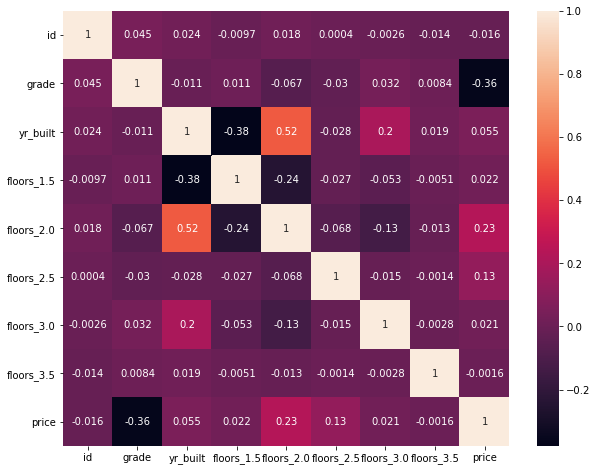

In [88]:
# Check Multicollinearity
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(train_df.corr(), annot=True,)
plt.show()